In [1]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt

## Question 1

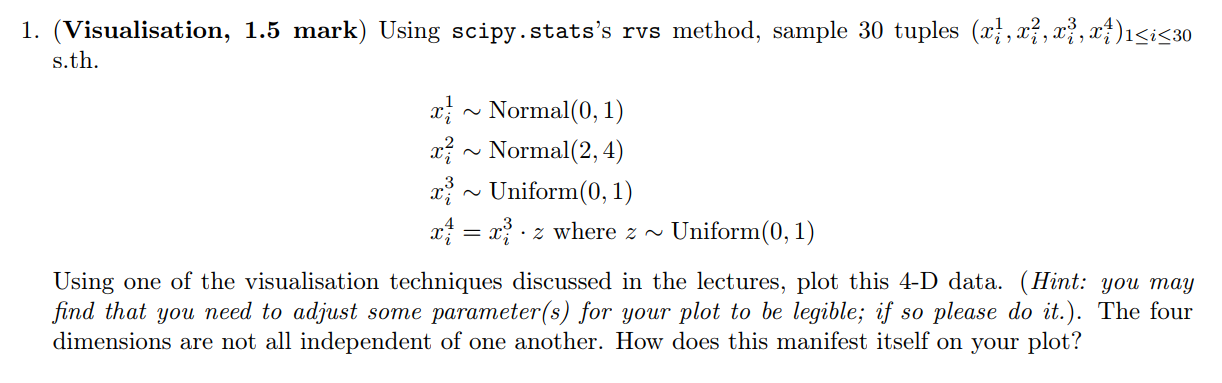

C:\Users\dibah\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\matplotlib\collections.py:996: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


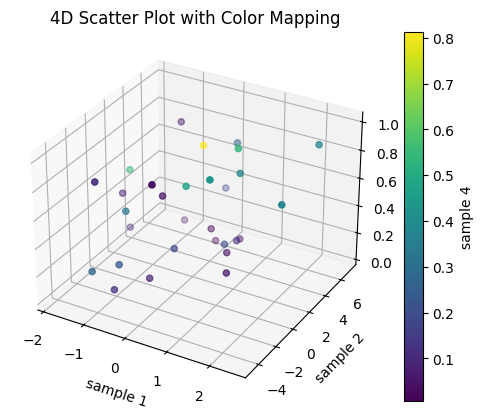

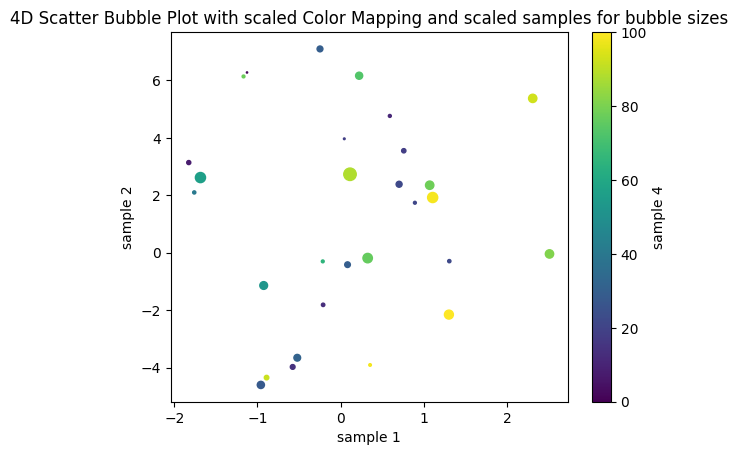

In [33]:
samples1 = stats.norm.rvs(loc=0, scale=1, size=30)
samples2 = stats.norm.rvs(loc=2, scale=4, size=30)
samples3 = stats.uniform.rvs(loc=0, scale=1, size=30)
samples4 = np.multiply(samples3, stats.uniform.rvs(loc=0, scale=1, size=30))

# tuples for each sample
sample_tuples = list(zip(samples1, samples2, samples3, samples4))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#sample 1 is used as the color map for this visulization
sc = ax.scatter(samples1, samples2, samples3, c=samples4, cmap='viridis')
cbar = plt.colorbar(sc)
cbar.set_label('sample 4')
ax.set_xlabel('sample 1')
ax.set_ylabel('sample 2')
plt.title('4D Scatter Plot with Color Mapping')

fig2 = plt.figure()
# Use samples3 as a colormap for color representation and samples 4 for size
sc = plt.scatter(samples1, samples2, c = (samples3-min(samples3))*100/(max(samples3)-min(samples3)), s=(samples4-min(samples4)/(max(samples4)-min(samples4)))*100, cmap='viridis')
# Add color bar to show the mapping from samples4 to colors
cbar = plt.colorbar(sc)
cbar.set_label('sample 4')
plt.xlabel('sample 1')
plt.ylabel('sample 2')
plt.title('4D Scatter Bubble Plot with scaled Color Mapping and scaled samples for bubble sizes')

plt.show()

As can be seen from the bubble plot sample 1 and 2 are independent from each other and the samples each have higher density around their mean which is zero and two for samples 1 and 2 respectively. the reason for this is that these samples are just random samples from normal distribution.

However, Samples 3 and 4 are dependent on one another because sample 4 is a product of sample 3. As can be seen from the bubble plot, as the size of the plot increases the color of the bubble becomes lighter which indicates that by increasing the sample 3 value sample 4 increases as well.

the set of samples 1 and 2 and the set of samples 3 and 4 have no relationship with each other because they are from different distributions therefore each two combinations is independent.

## Question 2

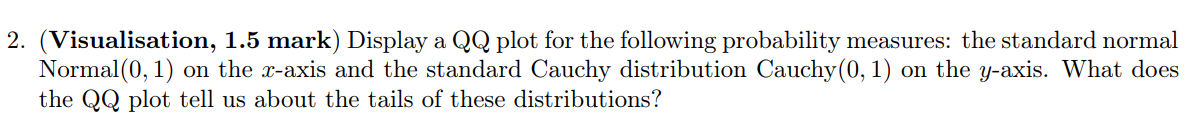

Text(0, 0.5, 'Quantiles of Cauchy')

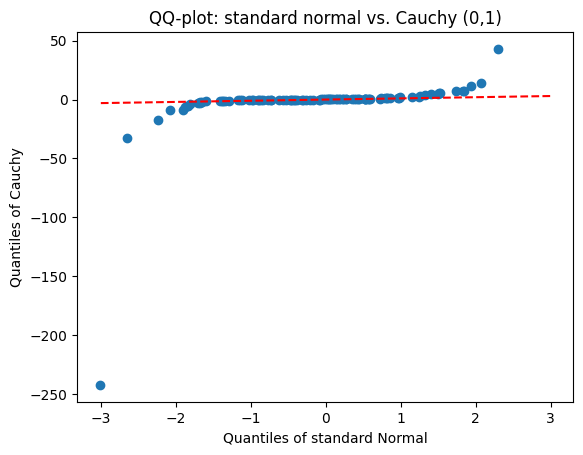

In [46]:
# normal samples
x_samples = np.random.normal(0,1,100)
# cauchy samples
y_samples = np.random.standard_cauchy(100)
# x_samples = np.sort(x_samples)
# y_samples = np.sort(y_samples)

plt.figure()
plt.scatter(x_samples, y_samples)
plt.plot([-3, 3], [-3, 3], color='red', linestyle='--')

plt.title("QQ-plot: standard normal vs. Cauchy (0,1)")
plt.xlabel("Quantiles of standard Normal")
plt.ylabel("Quantiles of Cauchy")

Text(0, 0.5, 'Quantiles of Cauchy')

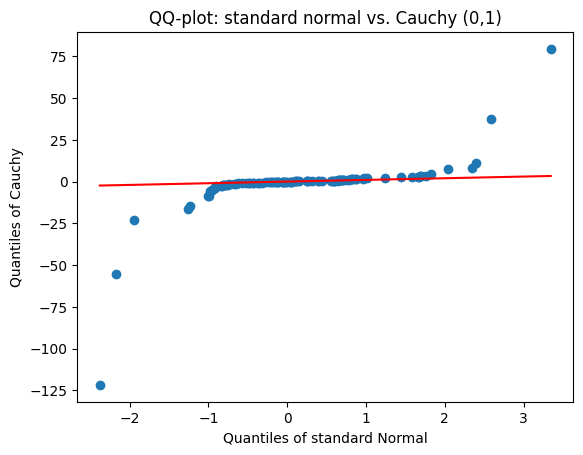

In [50]:
# normal samples
x_samples = np.random.normal(0,1,100)
# cauchy samples
y_samples = np.random.standard_cauchy(100)
p = np.linspace(0,100,100)
x = np.percentile(x_samples, p)
y = np.percentile(y_samples, p)
plt.plot(x, y, 'o')
plt.plot(x,x, color='red')
plt.title("QQ-plot: standard normal vs. Cauchy (0,1)")
plt.xlabel("Quantiles of standard Normal")
plt.ylabel("Quantiles of Cauchy")

Ishala al


## Question 3

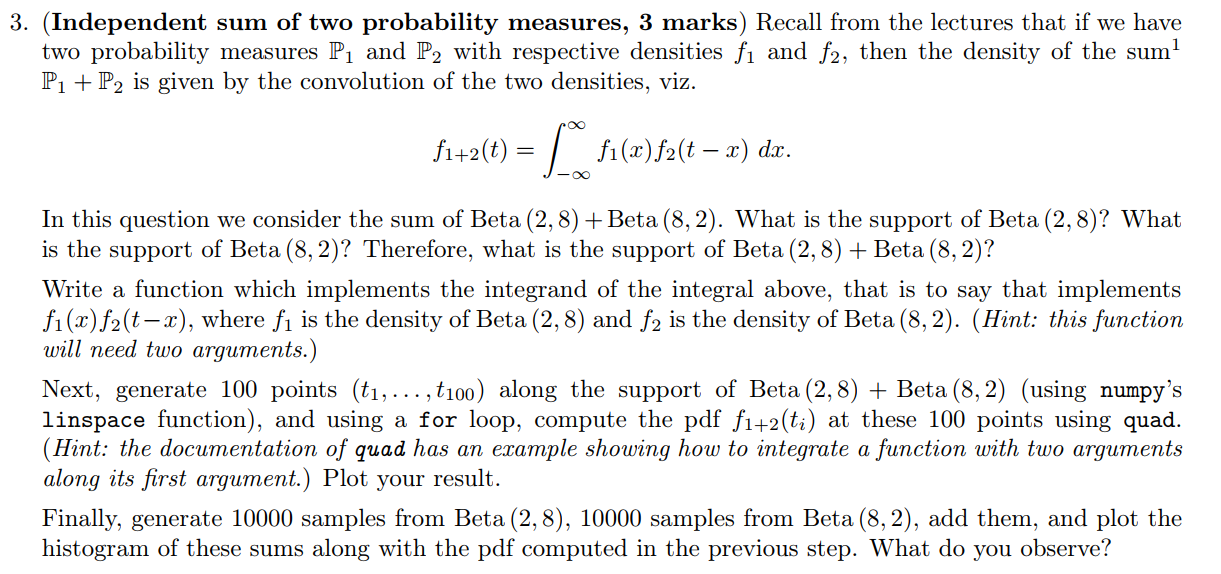

support of Beta(2,8) is [0,1]

support of Beta(8,2) is [0,1]

support of Beta(2,8)+Beta(8,2) is [0,1]

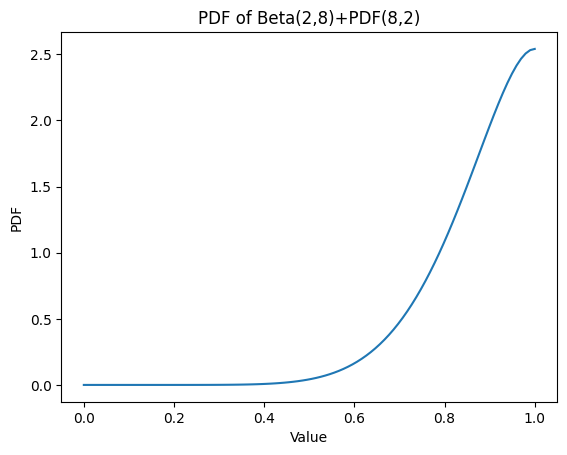

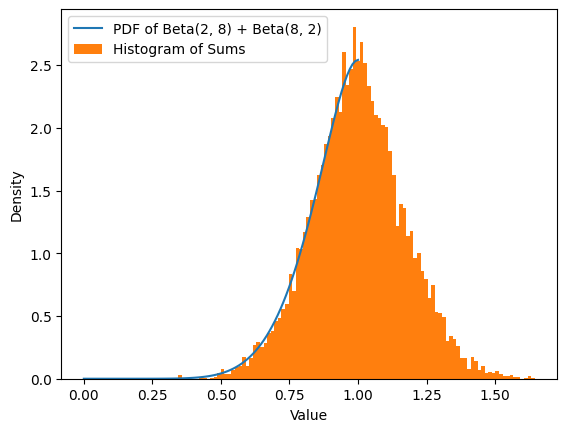

In [61]:
from scipy.integrate import quad
def integrand(x, t):
    f1 = stats.beta.pdf(x, 2, 8)
    f2 = stats.beta.pdf(t - x, 8, 2)
    return f1* f2
pdf_val = []
t_val = np.linspace(0, 1, 100)
for t in t_val:
    pdf_val.append(quad(integrand, 0, 1, args=(t))[0])
# Plot the PDF
plt.figure()
plt.plot(t_val, pdf_val, label='PDF of Beta(2, 8) + Beta(8, 2)')
plt.title("PDF of Beta(2,8)+PDF(8,2)")
plt.xlabel('Value')
plt.ylabel('PDF')
plt.figure()
# Generate 10,000 samples from Beta(2, 8) and Beta(8, 2), and add them
samples1 = stats.beta.rvs(2, 8, size=10000)
samples2 = stats.beta.rvs(8, 2, size=10000)
sum_samples = samples1 + samples2

# Plot a histogram of the sums
plt.plot(t_val, pdf_val, label='PDF of Beta(2, 8) + Beta(8, 2)')
plt.hist(sum_samples, bins=int(np.sqrt(10000)), density=True, label='Histogram of Sums')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

The central limit theorem shows that sums of random variables from different distributions tend to approach a normal distribution. This is demonstrated by the histogram of random samples, which matches the PDF of the sum computed using the integral. The PDF curve indicates that the sums of random variables tend to follow a normal distribution.

## Question 4

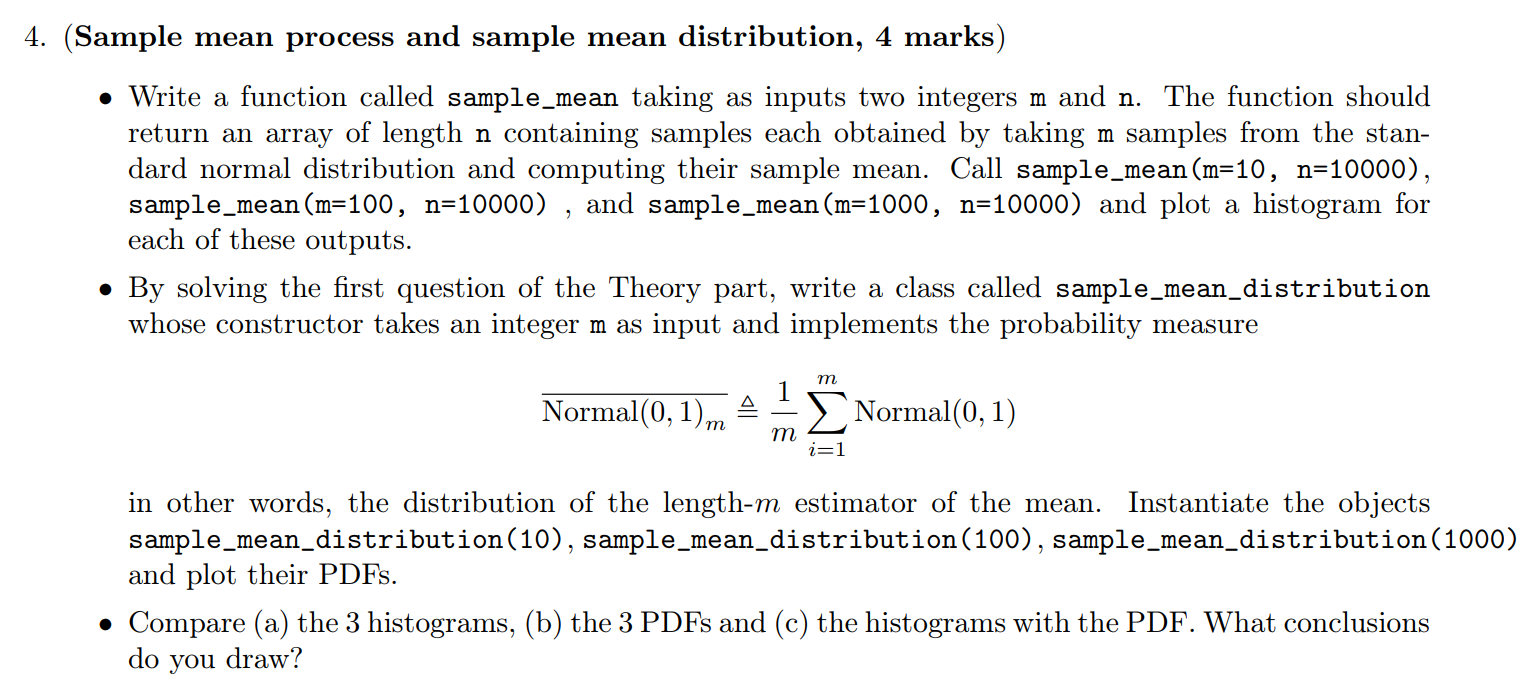

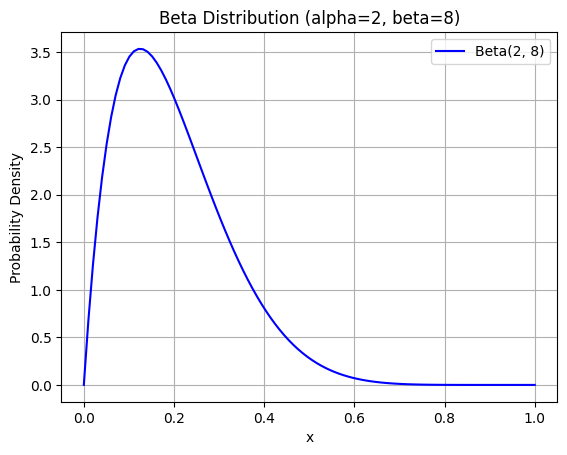

In [51]:
x = np.linspace(0, 1, 100)

# Calculate the probability density function (PDF) for the Beta distribution
pdf = stats.beta.pdf(x, 2, 8)

# Create the plot
plt.figure()
plt.plot(x, pdf, label=f'Beta(2, 8)', color='blue')
plt.title(f'Beta Distribution (alpha=2, beta=8)')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.legend()
plt.grid()
plt.show()

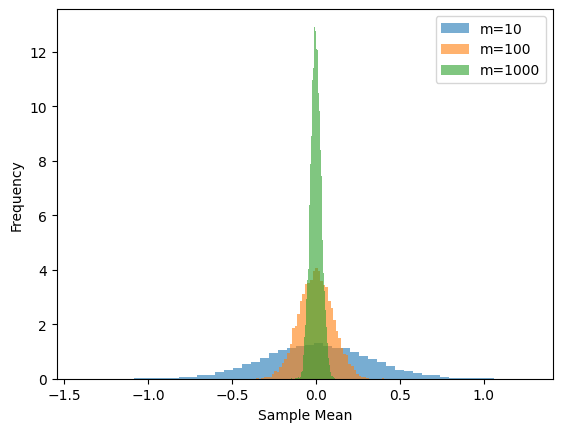

In [ ]:
def sample_mean(m, n):
    # Generate n arrays, each containing m samples from the standard normal distribution
    samples = np.random.normal(0, 1, size=(n, m))
    
    # Calculate the sample mean for each array
    sample_means = np.mean(samples, axis=1)
    
    return sample_means

# Set the parameters
m_values = [10, 100, 1000]
n = 10000

# Generate sample means and plot histograms
for m in m_values:
    sample_means = sample_mean(m, n)
    
    # Create a histogram
    plt.hist(sample_means, bins=50, density=True, alpha=0.6, label=f'm={m}')

# Add labels and legend
plt.xlabel('Sample Mean')
plt.ylabel('Frequency')
plt.legend()

# Show the plot
plt.show()

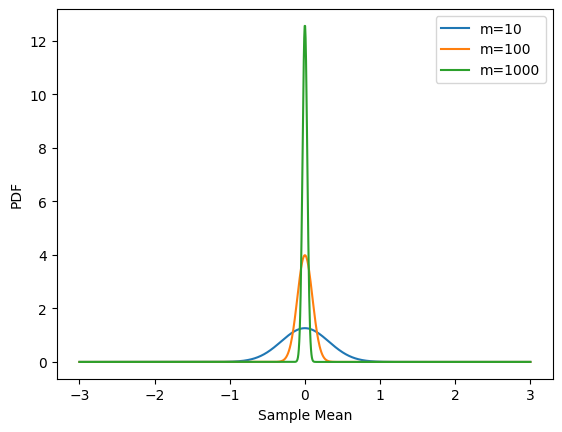

In [ ]:
class sample_mean_distribution:
    def __init__(self, m):
        self.m = m
    
    def pdf(self, x):
        # Calculate the probability density function (PDF) for the sample mean
        standard_deviation = 1.0 / np.sqrt(self.m)
        return stats.statsnorm.pdf(x, loc=0, scale=standard_deviation)

# Values of m for the three instances
m_values = [10, 100, 1000]

# Create objects and plot their PDFs
x = np.linspace(-3, 3, 1000)  # Range of x values for the PDF

for m in m_values:
    distribution = sample_mean_distribution(m)
    pdf_values = distribution.pdf(x)
    
    # Plot the PDF
    plt.plot(x, pdf_values, label=f'm={m}')

# Add labels and legend
plt.xlabel('Sample Mean')
plt.ylabel('PDF')
plt.legend()

# Show the plot
plt.show()